In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import matplotlib.ipympl
from astropy.coordinates import SkyCoord 
from astropy.convolution import Gaussian2DKernel
from astropy.io import fits
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.table import QTable, Table
import astropy.units as u
from astropy.visualization import make_lupton_rgb, SqrtStretch, ImageNormalize, simple_norm
import astropy.wcs as wcs


import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# date = 'May112023'

In [2]:
# baseurl = 'https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/nircam_photometry/'
# filepath = '../../ngc3324/NIRCAM_ALL_May112023/JWST/jw02731-o001_t017_nircam_'
filepath = '/Users/breannacrompvoets/DAOPHOT/daophot4/'
filters = 'f090w f187n f200w f335m f444w f470n f770w f1130w f1280w f1800w'.split()
# filters = 'f090w f187n f200w f335m f444w f444w-f470n f770w f1130w f1280w f1800w'.split()

# Data images [e-/s]
imagefiles = {}
for r, filt in enumerate(filters):
    filename = f'{filt}.fits'
    imagefiles[filt] = filepath + filename

    print(imagefiles[filt])

# imagefiles = {}
# for r, filt in enumerate(filters):
#     if r<5:
#         filename = f'clear-{filt}/jw02731-o001_t017_nircam_clear-{filt}_i2d.fits'
#         imagefiles[filt] = filepath + filename
#     elif filt == 'f444w-f470n': 
#         filename = f'{filt}/jw02731-o001_t017_nircam_{filt}_i2d.fits'
#         imagefiles[filt] = filepath + filename
#     else:
#         filepath = '../../ngc3324/MIRI_ALL_May112023/JWST/jw02731-o002_t017_miri_'
#         filename = f'{filt}/jw02731-o002_t017_miri_{filt}_i2d.fits'
#         imagefiles[filt] = filepath + filename

#     print(imagefiles[filt])

# filt = 'f444w'
# infile = imagefiles[filt]
# hdu = fits.open(infile)
# data = hdu[1].data
# imwcs = wcs.WCS(hdu[1].header, hdu)

# spitz_name = '../../ngc3324/FITS/SPITZER_45.fits'
# hdu_spitz = fits.open(spitz_name)

/Users/breannacrompvoets/DAOPHOT/daophot4/f090w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f187n.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f200w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f335m.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f444w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f470n.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f770w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f1130w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f1280w.fits
/Users/breannacrompvoets/DAOPHOT/daophot4/f1800w.fits


In [3]:

# cc_match = pd.read_csv('CC_Catalog_Feb172023_SPICY_Preds.csv')
# cc_match = pd.read_csv('CC_Catalog_2_5sigFeb172023_SPICY_Preds.csv')
cc_match = pd.read_csv('DAOPHOT_Catalog_May302023_SPICY_Preds.csv')
# w_jwst = wcs.WCS(hdu[1].header)
# w_spitz = wcs.WCS(hdu_spitz[0].header)

i=0
cc_match.columns

Index(['Unnamed: 0', 'x', 'y', 'f090w', 'e_f090w', 'f187n', 'e_f187n', 'f200w',
       'e_f200w', 'f335m', 'e_f335m', 'f444w', 'e_f444w', 'f470n', 'e_f470n',
       'RA', 'DEC', 'RAJ2000', 'DEJ2000', 'mag_IR1', 'e_mag_IR1', 'mag_IR2',
       'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'SPICY',
       'SPICY_Class', 'SPICY_Prob', 'SPICY_Class_0/1'],
      dtype='object')

In [4]:
# # %matplotlib ipympl

# if i < len(cc_match):
#     # print(cc_match.isophotal_vegamag_f444w.iloc[i], cc_match.mag_IR2.iloc[i])
#     # print(cc_match.RA.iloc[i], cc_match.DEC.iloc[i])
#     # print(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i])

#     fig, axs = plt.subplots(figsize=(10,10))
#     axs.imshow(data,vmax=10,origin='lower')
#     x, y = w_jwst.world_to_el(SkyCoord(cc_match.RA.iloc[i], cc_match.DEC.iloc[i],unit='deg'))
#     box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
#     circle = patches.Circle((x,y),cc_match['size'].iloc[i]*3600/0.031,linewidth=1,edgecolor='k',facecolor='none')
#     # print(cc_match['size'].iloc[i]*3600/0.031)
#     axs.add_patch(box)
#     axs.add_patch(circle)
#     x_s, y_s = w_jwst.world_to_pixel(SkyCoord(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i],unit='deg'))
#     box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#     axs.add_patch(box_s)
#     box_set = 100
#     axs.set_xlim(x-box_set,x+box_set)
#     axs.set_ylim(y-box_set,y+box_set)

#     print(i)
#     i +=1
#     print(cc_match[['isophotal_vegamag_f090w', 'isophotal_vegamag_f187n',
#        'isophotal_vegamag_f200w', 'isophotal_vegamag_f335m', 'isophotal_vegamag_f444w',
#        'isophotal_vegamag_f444w-f470n', 'isophotal_vegamag_f770w', 'isophotal_vegamag_f1130w',
#        'isophotal_vegamag_f1280w', 'isophotal_vegamag_f1800w']].iloc[i])
#     print(cc_match[['mag_J','mag_H','mag_Ks','mag_IR1','mag_IR2','mag_IR3','mag_IR4','SPICY']].iloc[i])
#     # axs[1].imshow(hdu_spitz[0].data, vmin=1,vmax=8,origin='lower')

#     # x, y = w.world_to_pixel(SkyCoord(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i],unit='deg'))
#     # x2, y2 = w.world_to_pixel(SkyCoord(cc_match.RA.iloc[i], cc_match.DEC.iloc[i],unit='deg'))
#     # box = patches.Rectangle((x-5, y-5), 10, 10, linewidth=1, edgecolor='w', facecolor='none')
#     # axs[1].add_patch(box)
#     # box2 = patches.Rectangle((x2-5, y2-5), 10, 10, linewidth=1, edgecolor='w', facecolor='none')
#     # axs[1].add_patch(box2)
#     # # box_set = 800
#     # axs[1].set_xlim(min_x,max_x)
#     # axs[1].set_ylim(min_y-200,max_y+200)

In [6]:
# i = 1

data = [fits.open(imagefiles[filt])[0].data for filt in filters]
w_jwst = [wcs.WCS(fits.open(imagefiles[filt])[0].header) for filt in filters]
# tables = [Table.read(imagefiles[filt].split('i2d')[0]+'cat.ecsv') for filt in filters]
tables = pd.read_csv('DAOPHOT_Catalog_May302023.csv')[['RA','DEC']]
vmax = [10,90,50,10,10,10,150,150,150,300]
scale = [0.031,0.031,0.031,0.063,0.063,0.063,0.11,0.11,0.11,0.11]


In [7]:
# from astropy.coordinates import match_coordinates_sky

# csv_1sig = pd.read_csv('CC_Catalog_May112023_SPICY_Preds.csv')

# sky_1sig = SkyCoord(csv_1sig.RA*u.deg, csv_1sig.DEC*u.deg)
# sky_2_5sig = SkyCoord(cc_match.RA*u.deg, cc_match.DEC*u.deg)
# # Set tolerance - matched objects that are at most this far apart are considered one object
# # tol = 0.005 #in degrees #max(catalog['size'])
# # Match
# idx, sep2d, _ = match_coordinates_sky(sky_2_5sig, sky_1sig, nthneighbor=1, storekdtree='kdtree_sky')
# # print(idx)
# cc_1sig = csv_1sig.iloc[idx]
# # cc_1sig.info()

In [8]:
np.where(cc_match['SPICY_Class_0/1'].values==0)[0]
p=0

2


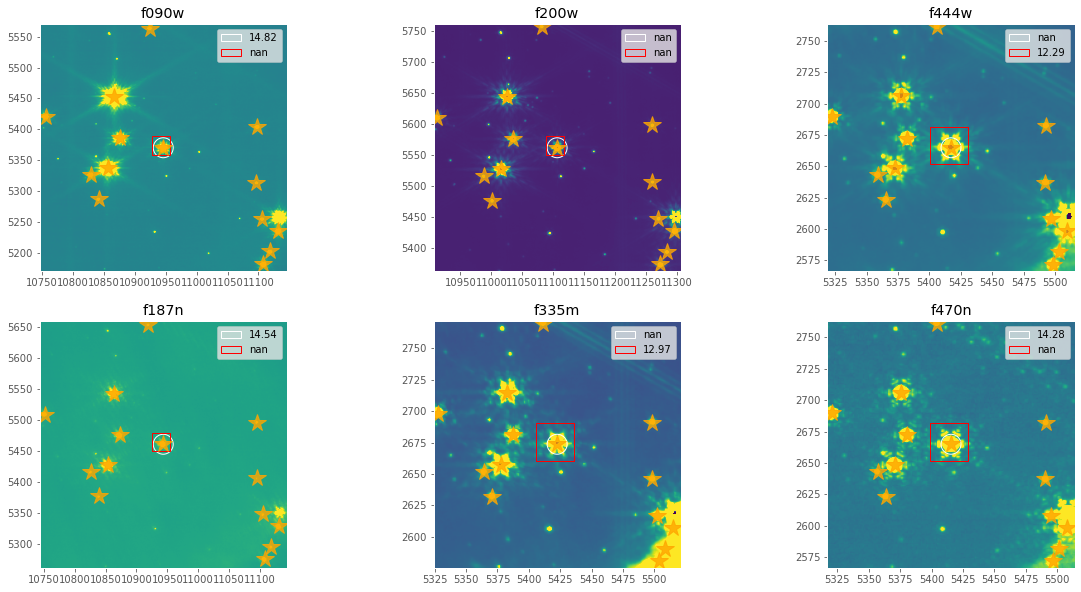

In [9]:
# for i in np.where(cc_1sig['SPICY_Class_0/1'].values==0)[0]:
i=np.where(cc_match['SPICY_Class_0/1'].values==0)[0][p]
l = 0 
fig, axs = plt.subplots(2,3,figsize=(20,10))

filters = 'f090w f187n f200w f335m f444w f470n'.split()
flux = ["%.2f" % cc_match[[filt]].iloc[i] for filt in filters]
# flux_1sig = ["%.2f" % cc_1sig[[f'isophotal_vegamag_{filt}']].iloc[i] for filt in filters]
flux_s = [np.nan, np.nan, np.nan,"%.2f" %  cc_match[['mag_IR1']].iloc[i],"%.2f" %  cc_match[['mag_IR2']].iloc[i], np.nan,"%.2f" %  cc_match[['mag_IR4']].iloc[i],np.nan,np.nan,np.nan]
for j in [0,1,2]:
# for j in [0,1,2,3,4]:
    for k in [0,1]:
        # if l < len(match_pot):
        x, y = w_jwst[l].world_to_pixel(SkyCoord(cc_match.RA.iloc[i], cc_match.DEC.iloc[i],unit='deg'))
        x_a, y_a = w_jwst[l].world_to_pixel(SkyCoord(tables.RA, tables.DEC,unit='deg'))
        # x_1, y_1 = w_jwst[l].world_to_pixel(SkyCoord(cc_1sig.RA.iloc[i], cc_1sig.DEC.iloc[i],unit='deg'))
        x_s, y_s = w_jwst[l].world_to_pixel(SkyCoord(cc_match.RAJ2000.iloc[i], cc_match.DEJ2000.iloc[i],unit='deg'))
        box_set = 200*0.031/scale[l]

        axs[k][j].imshow(data[l],vmax=vmax[l],origin='lower')



        # Plot boxes on top of image
        # circle = patches.Circle((x_1,y_1),cc_1sig['size'].iloc[i]*3600/scale[l],linewidth=1,edgecolor='k',facecolor='none')
        circle_2_5 = patches.Circle((x,y),0.5/scale[l],linewidth=1,edgecolor='w',facecolor='none')
        box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
        # axs[k][j].add_patch(circle)
        axs[k][j].add_patch(circle_2_5)
        axs[k][j].add_patch(box_s)


        axs[k][j].set_xlim(x-box_set,x+box_set)
        axs[k][j].set_ylim(y-box_set,y+box_set)

        axs[k][j].plot(x_a,y_a,'*',alpha=0.8,markersize=18,color='orange')
        # axs[k][j].plot(tables[l]['xcentroid'],tables[l]['ycentroid'],'*',alpha=0.8,markersize=18,color='orange')
        axs[k][j].set_title(filters[l])
        axs[k][j].legend(labels= [flux[l], flux_s[l]])
        # axs[k][j].legend(labels= [flux_1sig[l],flux[l], flux_s[l], 'In band'])
        axs[k][j].grid(False)
        l += 1
print(i)
# plt.showfig()
# plt.savefig(f'./Figures/sigma_flux_comparison_SPICY_{int(cc_match.SPICY.iloc[i])}'+date+'.png',dpi=300)
p+=1

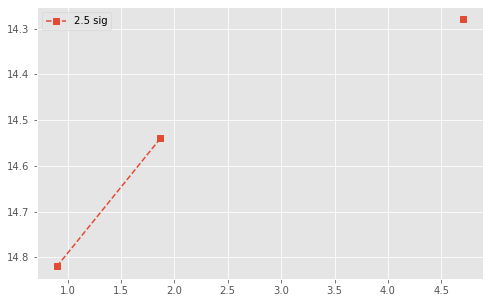

In [10]:
wls = [0.9,1.87,2.0,3.35,4.44,4.7]#,7.7,11.3,12.8,18]
plt.close(1)
plt.figure(1,figsize=(8,5))
plt.plot(wls,[float(flux[w]) for w in range(0,len(wls))],'s',linestyle='--',label='2.5 sig')
# plt.plot(wls,[float(flux_1sig[w]) for w in range(0,len(wls))],'o',label='1 sig')
plt.gca().invert_yaxis()
plt.legend()


In [11]:
# cc_match = pd.read_csv('CC_Catalog_Feb172023_SPICY_Preds.csv')
# cc_match.set_index(cc_match['Unnamed: 0'],inplace=True)
# subset = cc_match.loc[[38,45,52,85,111,118,125,169,206,263,271,283,291,353,366,368,397]]
# # print(len(cc_match))

# webb_raw = pd.read_csv('CC_Catalog_Feb172023.csv')

In [13]:
# def find_closest(ra,dec, webb_dat, tol=0.01):
#     mask = np.sqrt((webb_dat.RA - ra)**2 + (webb_dat.DEC - dec)**2) < tol
#     return webb_dat[mask]

    

In [14]:
# i =2
# print(subset.index[i])

# filt = 'f444w'
# infile = imagefiles[filt]
# hdu = fits.open(infile)
# data = hdu[1].data
# imwcs = wcs.WCS(hdu[1].header, hdu)

# x_s, y_s = w_jwst.world_to_pixel(SkyCoord(subset.RAJ2000.iloc[i], subset.DEJ2000.iloc[i],unit='deg'))
# box_set = 400

# # Find all objects close to Spitzer object and save in new dataframe
# match_pot = find_closest(subset.RAJ2000.iloc[i],subset.DEJ2000.iloc[i],webb_raw,tol=0.002)
# print(len(match_pot))
# # print(subset.RAJ2000.iloc[i])
# # print(match_pot.RA.iloc[i])

# l = 0 
# fig, axs = plt.subplots(3,4,figsize=(15,10))
# for j in [0,1,2,3]:
#     for k in [0,1,2]:
#         if l < len(match_pot):
#             x, y = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[l], match_pot.DEC.iloc[l],unit='deg'))
#         else:
#             x, y = w_jwst.world_to_pixel(SkyCoord(subset.RA.iloc[i], subset.DEC.iloc[i],unit='deg'))
#         # Plot image
#         axs[k][j].imshow(data,vmax=10,origin='lower')

#         # Plot boxes on top of image
#         # x, y = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[l], match_pot.DEC.iloc[l],unit='deg'))
#         box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
#         box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#         axs[k][j].add_patch(box)
#         axs[k][j].add_patch(box_s)
#         axs[k][j].set_xlim(x-box_set,x+box_set)
#         axs[k][j].set_ylim(y-box_set,y+box_set)
#         l += 1

# # print(i)

In [15]:
# n=2
# fig, axs = plt.subplots(figsize=(10,10))
# axs.imshow(data,vmax=10,origin='lower')
# x_og, y_og = w_jwst.world_to_pixel(SkyCoord(subset.RA.iloc[i], subset.DEC.iloc[i],unit='deg'))
# box = patches.Rectangle((x-20, y-20), 40, 40, linewidth=1, edgecolor='w', facecolor='none')
# axs.add_patch(box)
# x_new, y_new = w_jwst.world_to_pixel(SkyCoord(match_pot.RA.iloc[n], match_pot.DEC.iloc[n],unit='deg'))
# box_n = patches.Rectangle((x_new-20, y_new-20), 35, 35, linewidth=1, edgecolor='yellow', facecolor='none')
# axs.add_patch(box_n)
# x_s, y_s = w_jwst.world_to_pixel(SkyCoord(cc_match.RAJ2000.loc[subset.index[i]], cc_match.DEJ2000.loc[subset.index[i]],unit='deg'))
# box_s = patches.Rectangle((x_s-15, y_s-15), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
# axs.add_patch(box_s)
# box_set = 400
# axs.set_xlim(x_s-box_set,x_s+box_set)
# axs.set_ylim(y_s-box_set,y_s+box_set)

# print(subset.isophotal_vegamag_f444w.iloc[i],match_pot.isophotal_vegamag_f444w.iloc[n],subset.mag_IR2.iloc[i])